# Linear Regression Project

## Imports

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting the Data

In [183]:
# Importing Ecommerece Customers csv file as a DataFrame
data = pd.read_csv('Ecommerce Customers')

Exploring the information provided in the csv file

In [184]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [186]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis
Using seaborn to create a jointlplot to see if a correlation exists between Time on Website and Yearly Amount Spent

In [187]:
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')

Time on Website vs Yearly Amount Spent

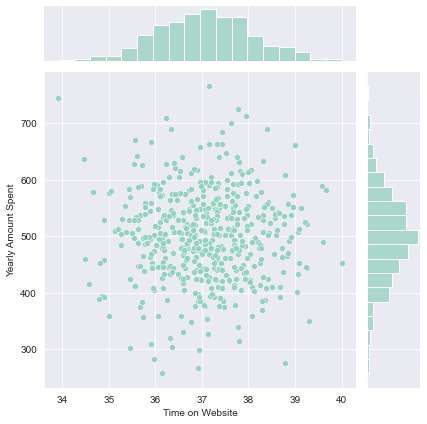

In [188]:
# Plotting relation between Time spent on website and Yearly Amount Spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)

Time on App vs Yearly Amount Spent

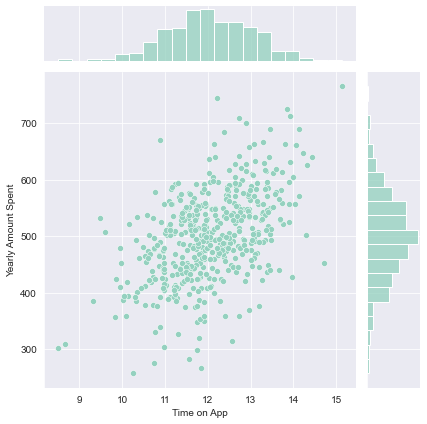

In [189]:
# Plotting relation between Time spent on App and Yearly Amount Spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data)

Comparing all the given paramteres with each other using pairplot

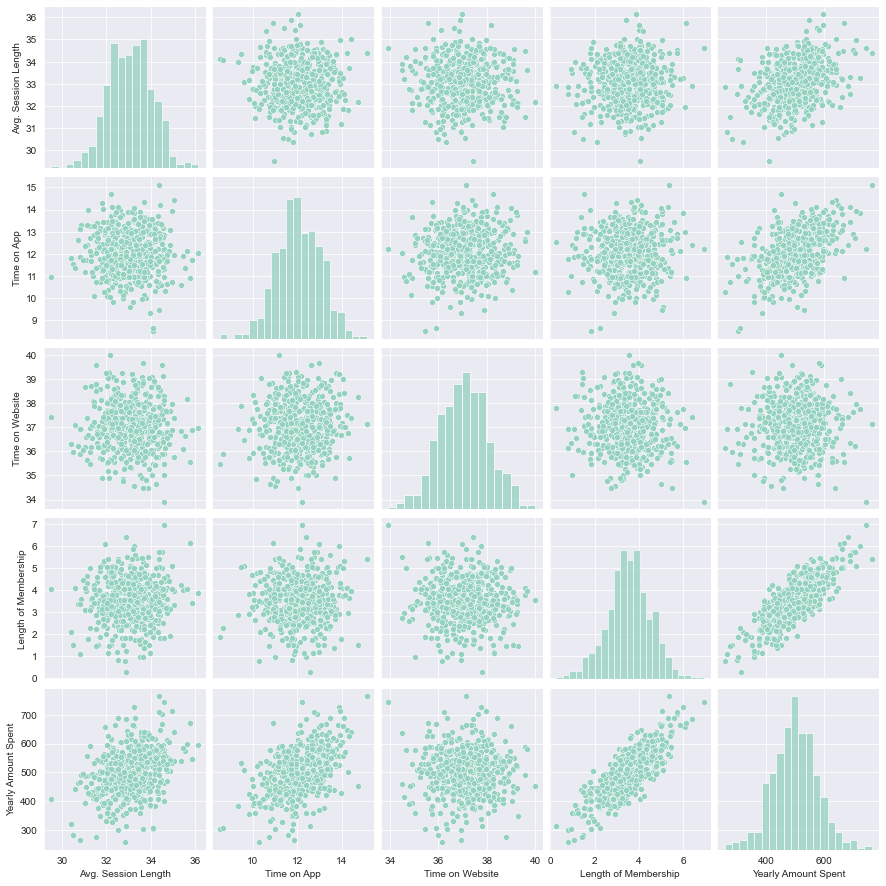

In [190]:
sns.pairplot(data)

The above plot shows that Length of membership has the most correlation (has a linear relationship) with the Yearly amount spent.

A linear model of Yearly Amount Spent vs. Length of Membership using seaborn's Implot:

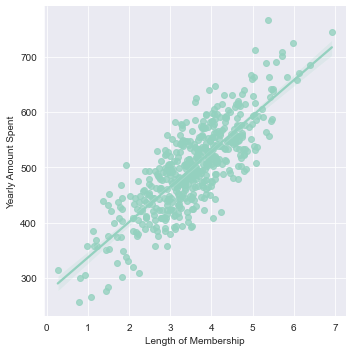

In [191]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [192]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Making the Linear regression Model

Constructing the hypothesis using the following features(x):

    Avg. Session Length
    Time on App
    Time on Website
    Length of Membership

The output(y) Yearly Amount Spent.

The following model will find the coefficients corresponding to the above features. The feature with the highest coefficient has the highest correlation to Yearly Amount Spent and thus, this parameter should me focued on by the company.

In [194]:
# separating target x from target value (y)
x = data.iloc[:,3:7]
x.insert(0,'Ones',1)
print('x:', x)

y = data.iloc[:,7:8]
print('y:', y)

x:      Ones  Avg. Session Length  Time on App  Time on Website  \
0       1            34.497268    12.655651        39.577668   
1       1            31.926272    11.109461        37.268959   
2       1            33.000915    11.330278        37.110597   
3       1            34.305557    13.717514        36.721283   
4       1            33.330673    12.795189        37.536653   
..    ...                  ...          ...              ...   
495     1            33.237660    13.566160        36.417985   
496     1            34.702529    11.695736        37.190268   
497     1            32.646777    11.499409        38.332576   
498     1            33.322501    12.391423        36.840086   
499     1            33.715981    12.418808        35.771016   

     Length of Membership  
0                4.082621  
1                2.664034  
2                4.104543  
3                3.120179  
4                4.446308  
..                    ...  
495              3.746573  
496 

In [195]:
x.head()

,Ones,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1,34.497268,12.655651,39.577668,4.082621
1,1,31.926272,11.109461,37.268959,2.664034
2,1,33.000915,11.330278,37.110597,4.104543
3,1,34.305557,13.717514,36.721283,3.120179
4,1,33.330673,12.795189,37.536653,4.446308


In [196]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [197]:
# initializing the coefficient to be zero
theta = np.array([0.0,0.0,0.0,0.0,0.0])

# HYPOTHESIS FUNCTION
def hypothesis(theta,x):
    return x*theta

# COST FUNCTION
def computeCost(x,y,theta):
    y2 = hypothesis(theta,x)
    y2 = np.sum(y2,axis=1)
#     z = np.sum((y2-y)**2)/(2*len(x))
    return np.sum((y2-y['Yearly Amount Spent'])**2)/(2*len(x))

# GRADIENT DESCENT FUNCTION
def gradientDescent(x, y, theta, alpha, iters):
    J = [] # cost function
    for i in range(iters):
        y2 = hypothesis(theta,x)
        y2 = np.sum(y2, axis=1)
        for j in range(0,len(x.columns)):
            theta[j] = theta[j] - (alpha*(np.sum((y2-y['Yearly Amount Spent'])*x.iloc[:,j])))/len(x)
#             print(theta)
        j = computeCost(x, y, theta) #cost
        J.append(j)
    return j, J, theta

# initialize variables for learning rate and iterations
alpha = 0.0001
iters = 10000

j, J, theta = gradientDescent(x,y,theta,alpha,iters)

In [198]:
print(theta)

[-0.22527795 10.6267611  22.46788668 -7.02521244 39.12936698]


In [199]:
#Predicting the output using the optimized theta
predicted_value = hypothesis(theta,x)
predicted_value = np.sum(predicted_value, axis=1)
predicted_value = pd.DataFrame(predicted_value)
print(predicted_value)

              0
0    532.423516
1    431.073310
2    504.933309
3    536.651028
4    551.730929
..          ...
495  548.543280
496  510.006348
497  529.790896
498  464.909805
499  492.816849

[500 rows x 1 columns]


# Evaluating the model
Comparing predicted values with original values to see if the model can be used.

In [200]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y, predicted_value)
print('MAE:', mae)
print('Accuracy %:', 100-mae)

MAE: 27.15401099707013
Accuracy %: 72.84598900292987


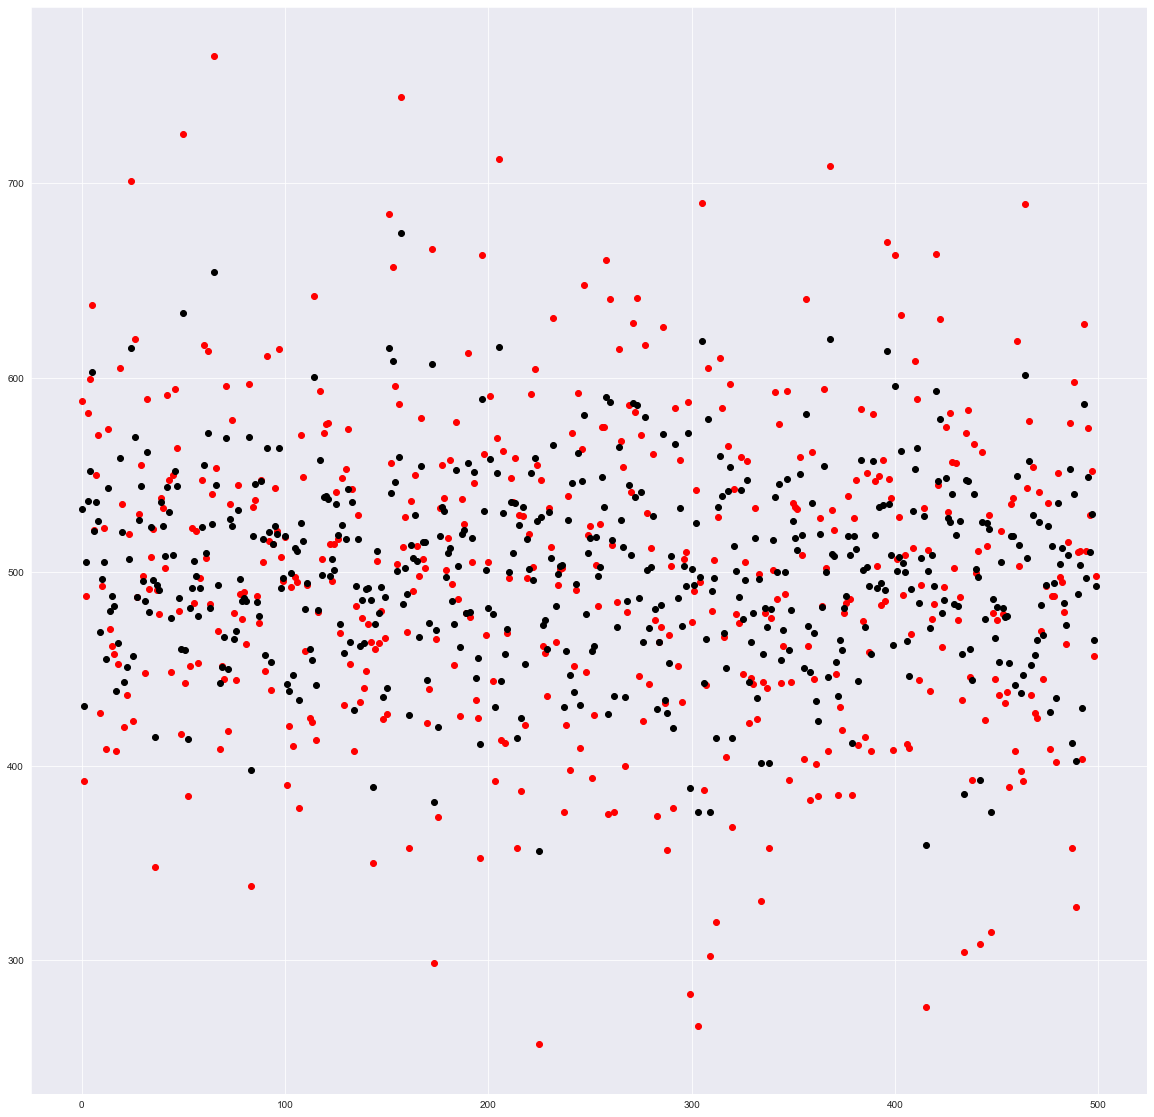

In [201]:
#Plotting the original y and the predicted output
plt.figure(figsize=(20,20))
plt.scatter(x=list(range(0, 500)),y=y, color='red', label = 'Actual value')         
plt.scatter(x=list(range(0, 500)), y=predicted_value, color='black', label='Predicted value')
plt.show()

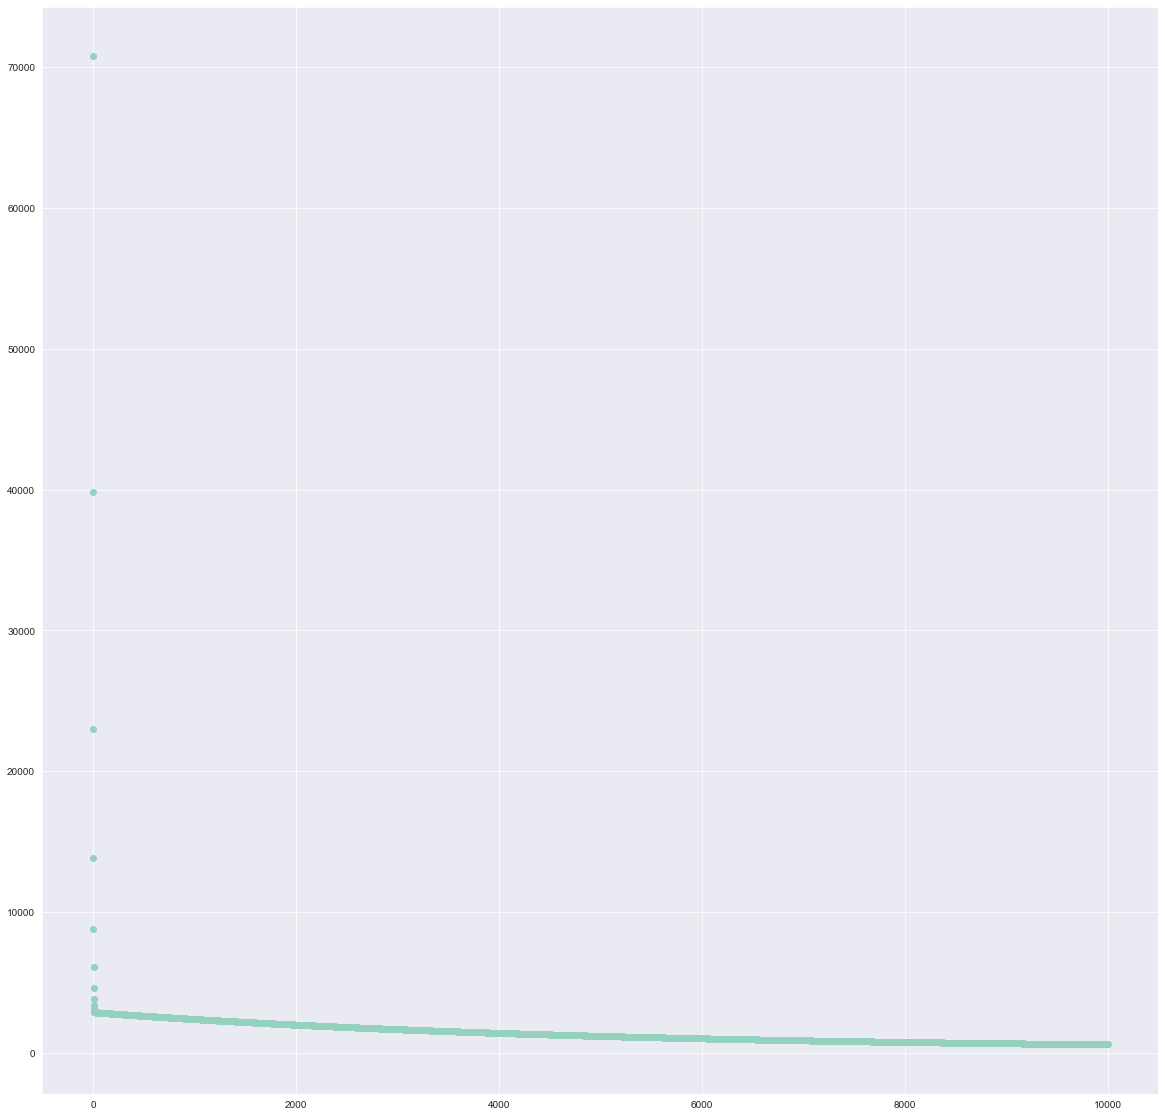

In [208]:
# Plotting the cost of each iteration to see the behavior
plt.figure(figsize=(20,20))
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

The converging graph for J implies that error is converging.

# Conclusion
To decide if efforts should be put in mobile app or website, we see the feature with the highest coefficient. This feature has the highest correlation/impact on the Yearly Amount Spent and thus, this parameter should me focued on by the company.

In [206]:
theta

array([-0.22527795, 10.6267611 , 22.46788668, -7.02521244, 39.12936698])

In [207]:
coefficient = [x.columns]
coefficient = pd.DataFrame(coefficient)
coefficient = coefficient.transpose()
coefficient['Coeff.'] = theta.T
coefficient

,0,Coeff.
0,Ones,-0.225278
1,Avg. Session Length,10.626761
2,Time on App,22.467887
3,Time on Website,-7.025212
4,Length of Membership,39.129367


Time on App has more impact than time on website. Hence, the company should focus on improving the app.